In [11]:
import pandas as pd
import numpy as np 
data_set= pd.read_csv('/home/boras/Downloads/monatszahlen2112_verkehrsunfaelle.csv')
data_set.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

In [12]:
## we notice that we need to delete the useless features

In [13]:
infos= data_set.copy()
infos = infos.drop(['VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT','VORJAHRESWERT'], axis=1)

In [14]:
infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1995 non-null   object 
 1   AUSPRAEGUNG  1995 non-null   object 
 2   JAHR         1995 non-null   int64  
 3   MONAT        1995 non-null   object 
 4   WERT         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.1+ KB


In [15]:
## we deduce that there is additional rows for features than our label
## + 3 features are categorical and 2 are numerical

In [16]:
## for the numbers
infos.describe()

,JAHR,WERT
count,1995.000000,1911.000000
mean,2010.463158,1440.540031
std,6.326381,4655.514611
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2010.000000,399.000000
75%,2016.000000,864.000000
max,2021.000000,46988.000000


In [17]:
#describe as categorical
infos.astype('object').describe()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
count,1995,1995,1995,1995,1911.0
unique,3,3,22,265,930.0
top,Verkehrsunfälle,insgesamt,2010,Summe,21.0
freq,855,855,91,147,21.0


In [19]:
infos[infos['JAHR']==2021]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN
...,...,...,...,...,...
1717,Verkehrsunfälle,Verletzte und Getötete,2021,202108,NaN
1718,Verkehrsunfälle,Verletzte und Getötete,2021,202109,NaN
1719,Verkehrsunfälle,Verletzte und Getötete,2021,202110,NaN
1720,Verkehrsunfälle,Verletzte und Getötete,2021,202111,NaN


In [ ]:
## we can deduce that the values of 2021 are the null ones that we should forecast

 ### visualising historically the number of accidents per category 

By year

In [21]:
groupbydf=pd.crosstab( infos['JAHR'],infos['MONATSZAHL'])
groupbydf

MONATSZAHL,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
JAHR,,,
2000,26,26,39
2001,26,26,39
2002,26,26,39
2003,26,26,39
2004,26,26,39
2005,26,26,39
2006,26,26,39
2007,26,26,39
2008,26,26,39


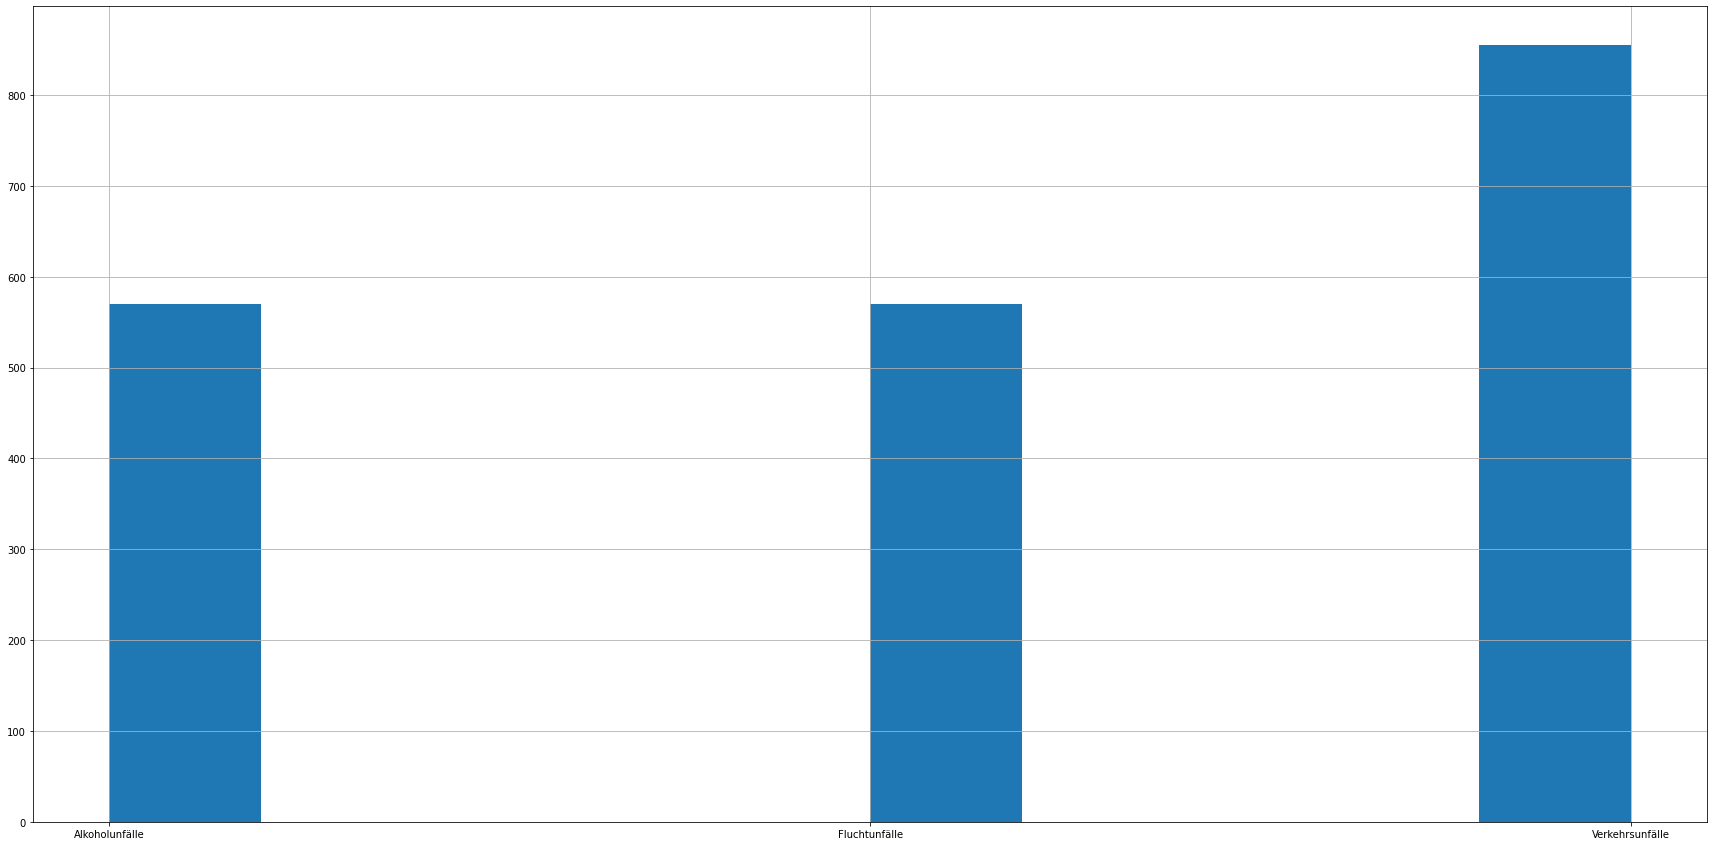

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
infos["MONATSZAHL"].hist(bins=10, figsize=(30,15))
plt.show()

In [23]:
# we can see that both Alcohol accidents and Escape accidents are similar and Traffic accidents are about 300 cases more.
# there is a yearly similarity.

Correlation of year?

In [28]:
corr_matrix = infos.corr()
corr_matrix["WERT"].sort_values(ascending=False)

WERT    1.000000
JAHR    0.006145
Name: WERT, dtype: float64

In [ ]:
#Not really.

### We do some data preparation and readings before reading the months

In [24]:
infos["MONATSZAHL"].explode().unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [25]:
infos["AUSPRAEGUNG"].explode().unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [26]:
infos["MONAT"].explode().unique()

array(['202101', '202102', '202103', '202104', '202105', '202106',
       '202107', '202108', '202109', '202110', '202111', '202112',
       'Summe', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '201505',
       '201506', '201507', '201508', '201509', '201510', '201511',
       '201512', '201401', '201402', '201403', '201404', '20140

In [27]:
# 3 values for category and type;

### Work on Monat

In [29]:
infos["MONAT"][0][:4]

'2021'

In [30]:
import plotly.express as px
df = infos
fig = px.histogram(df, x="MONAT",
             color='MONATSZAHL', barmode='group',
             )
fig.show()

In [31]:
# The number of accidents is independant to time for each category. The number stays the same independantly.

### prepare Monat

In [33]:
data_forecast=infos.copy()
data_forecast= data_forecast[data_forecast.MONAT != "Summe"]
data_forecast['MONAT']=pd.to_datetime(data_forecast['MONAT'],format='%Y%m')

In [34]:
data_forecast[data_forecast['MONAT']=="2006-05-01"]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
199,Alkoholunfälle,insgesamt,2006,2006-05-01,53.0
484,Alkoholunfälle,Verletzte und Getötete,2006,2006-05-01,28.0
769,Fluchtunfälle,insgesamt,2006,2006-05-01,476.0
1054,Fluchtunfälle,Verletzte und Getötete,2006,2006-05-01,33.0
1339,Verkehrsunfälle,insgesamt,2006,2006-05-01,3032.0
1624,Verkehrsunfälle,mit Personenschäden,2006,2006-05-01,471.0
1909,Verkehrsunfälle,Verletzte und Getötete,2006,2006-05-01,564.0


### a table that shows all the possible values (we are only interested in the combination 'Alkoholunfälle', 'insgesamt' but we will work on it all for now)

In [35]:
pivot_f=data_forecast.pivot_table(index='MONAT',values='WERT',columns=['MONATSZAHL','AUSPRAEGUNG'],aggfunc='sum')
pivot_f

MONATSZAHL          Alkoholunfälle                    Fluchtunfälle            \
AUSPRAEGUNG Verletzte und Getötete insgesamt Verletzte und Getötete insgesamt   
MONAT                                                                           
2000-01-01                    37.0      78.0                   34.0     835.0   
2000-02-01                    19.0      53.0                   35.0     890.0   
2000-03-01                    18.0      73.0                   48.0     974.0   
2000-04-01                    26.0      78.0                   57.0     834.0   
2000-05-01                    44.0      96.0                   69.0    1086.0   
...                            ...       ...                    ...       ...   
2021-08-01                     0.0       0.0                    0.0       0.0   
2021-09-01                     0.0       0.0                    0.0       0.0   
2021-10-01                     0.0       0.0                    0.0       0.0   
2021-11-01                     0.0       0.0                    0.0       0.0   
2021-12-01                     0.0       0.0                    0.0       0.0   

MONATSZAHL         Verkehrsunfälle                                
AUSPRAEGUNG Verletzte und Getötete insgesamt mit Personenschäden  
MONAT                                                             
2000-01-01                   434.0    3448.0               321.0  
2000-02-01                   419.0    3181.0               329.0  
2000-03-01                   509.0    3783.0               414.0  
2000-04-01                   557.0    3317.0               441.0  
2000-05-01                   675.0    4123.0               568.0  
...                            ...       ...                 ...  
2021-08-01                     0.0       0.0                 0.0  
2021-09-01                     0.0       0.0                 0.0  
2021-10-01                     0.0       0.0                 0.0  
2021-11-01                     0.0       0.0                 0.0  
2021-12-01                     0.0       0.0                 0.0  

[264 rows x 7 columns]

In [39]:
import plotly.graph_objects as go
# instantiate the figure object
fig = go.Figure()

# add a scatter trace for every column
for col in pivot_f.columns:
    print(col)
    fig.add_scatter(x=pivot_f.index, y=pivot_f[col], name=col[0])

# change the scale to logarithmic and add title
fig.update_layout(
    yaxis=dict(type="log")
)

fig.show()

('Alkoholunfälle', 'Verletzte und Getötete')
('Alkoholunfälle', 'insgesamt')
('Fluchtunfälle', 'Verletzte und Getötete')
('Fluchtunfälle', 'insgesamt')
('Verkehrsunfälle', 'Verletzte und Getötete')
('Verkehrsunfälle', 'insgesamt')
('Verkehrsunfälle', 'mit Personenschäden')


### As I mentioned before we are only interested int the combination 'Alkoholunfälle', 'insgesamt' 

In [40]:
our_pivot_table=pivot_f.copy()
import plotly.graph_objects as go
# instantiate the figure object
fig = go.Figure()

# add a scatter trace for every column
for col in our_pivot_table.columns:
    if col == ('Alkoholunfälle', 'insgesamt'):
        fig.add_scatter(x=our_pivot_table.index, y=our_pivot_table[col], name=col[0])

# change the scale to logarithmic and add title
fig.update_layout(
    yaxis=dict(type="log")
)

fig.show()
